# 3. 데이터 분석 & 시각화
- 가설 : 영화가 장르로 구분이 되는 것처럼 영화 음악 또한 비슷한 음악끼리 묶일 수도 있다.
- K-means clustering으로 모든 음악을 군집으로 나누고 Euclidean distance를 이용해 가장 가까운 거리의 영화를 찾는다.
- 9개의 features(acousticness, danceability, energy, tempo, valence, instrumentalness, liveness, loudness, speechiness)를 사용해 K-means clustering을 진행한다.
    - Elbow method를 통해 k값을 결정하고, pca와 t-sne를 통해 군집이 잘 됐는지 확인한다.
    - 군집이 잘 됐다면 cluster별로 어떤 특징이 있는지 확인한다.
    - Euclidean distance로 가장 가까운 거리의 영화를 찾는다.

## 3-1. 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
only_song = pd.read_csv('only_song.csv')
only_song = only_song.drop(columns=['Unnamed: 0'])
only_song.head()

,title,music_director,artist_id,album_name,album_uri,track_name,preview_url,most_popular,popularity,acousticness,danceability,energy,tempo,valence,instrumentalness,liveness,loudness,speechiness
0,Inception,Hans Zimmer,0YC192cP3KPCRWx8zr8MfZ,Inception (Music From The Motion Picture),spotify:album:2qvA7HmSg1iM6XMiFF76dp,Time,https://p.scdn.co/mp3-preview/eb463247243646de...,6ZFbXIJkuI1dVNWvzJzown,73,0.155,0.221,0.0879,126.622,0.0401,0.698,0.0869,-16.996,0.0381
1,The Matrix,Don Davis,3eCpCUtYdBCM1twAb4mk8I,The Matrix Symphony,spotify:album:5vjpOYcCpXCWD0C2DKyqOS,The Matrix Symphony: 1. The Matrix,https://p.scdn.co/mp3-preview/246d8c1287fa0ffc...,72Dga8dl4M9aDnq2KEyQ74,9,0.881,0.091,0.2790,76.256,0.0372,0.916,0.1050,-16.499,0.0412
2,Avengers: Infinity War,Alan Silvestri,0Xk15jHKly4c3AhPr5vjoA,Avengers: Infinity War (Original Motion Pictur...,spotify:album:6Ltf5m1jvSomNQ0bhfuj5O,Porch,NaN,4tU1GfEahdy2NKGviJJuM4,53,0.912,0.127,0.0355,65.659,0.0834,0.594,0.1190,-28.803,0.0447
3,Back to the Future,Alan Silvestri,0Xk15jHKly4c3AhPr5vjoA,"Suite (From ""Back to the Future"")",spotify:album:205IlNRgW39tVyIKn1u7ek,"Suite (From ""Back to the Future"")",https://p.scdn.co/mp3-preview/6ea6ffaf6fdbda44...,3n0z81c5eX1gMaCJ9bLhnP,25,0.870,0.197,0.4990,79.723,0.1480,0.776,0.0398,-9.874,0.0581
4,"The Good, the Bad and the Ugly",Ennio Morricone,1nIUhcKHnK6iyumRyoV68C,"The Good, the Bad and the Ugly",spotify:album:7AOc5FtspkyvtF1eNUcnLx,"The Good, the Bad and the Ugly",https://p.scdn.co/mp3-preview/877d06cb3206d0b9...,3rBGxdOtyBepvioj1LwRwc,0,0.971,0.776,0.1060,119.929,0.1550,0.765,0.0825,-17.246,0.0794


## 3-2. 9개의 feature 정규화

In [4]:
# 정규화 -> 어떤 feature 정할지 결정
from sklearn import preprocessing

features = only_song[['acousticness','danceability','energy','tempo',
                      'valence','instrumentalness','liveness','loudness','speechiness']]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)
features_normal = pd.DataFrame(features_normal)
features_normal.columns = features.columns
features_normal # 정규화된 features

,acousticness,danceability,energy,tempo,valence,instrumentalness,liveness,loudness,speechiness
0,0.155617,0.243660,0.087758,0.585051,0.041213,0.700803,0.068184,0.631773,0.041145
1,0.884537,0.100331,0.279941,0.352337,0.038232,0.919679,0.089317,0.643758,0.044492
2,0.915662,0.140022,0.035061,0.303374,0.085714,0.596386,0.105663,0.347054,0.048272
3,0.873493,0.217200,0.501188,0.368356,0.152107,0.779116,0.013193,0.803516,0.062743
4,0.974899,0.855568,0.105960,0.554126,0.159301,0.768072,0.063047,0.625745,0.085745
...,...,...,...,...,...,...,...,...,...
1348,0.668673,0.233738,0.352349,0.508412,0.050771,0.943775,0.042615,0.715739,0.037689
1349,0.246983,0.194046,0.439842,0.705340,0.127441,0.951807,0.113835,0.698691,0.034881
1350,0.764055,0.202867,0.186414,0.551945,0.040904,0.225904,0.366025,0.579541,0.046436
1351,0.022082,0.390298,0.277930,0.424814,0.080164,0.062249,0.055225,0.682872,0.032829


## 3-3. 상관분석 & heatmap

In [5]:
# feature별 상관분석
cor = pd.DataFrame(features_normal).corr()
cor

,acousticness,danceability,energy,tempo,valence,instrumentalness,liveness,loudness,speechiness
acousticness,1.000000,-0.341780,-0.706362,-0.195896,-0.344548,0.268056,-0.088105,-0.532820,-0.091018
danceability,-0.341780,1.000000,0.541464,0.206968,0.669313,-0.398778,0.053790,0.465611,0.207435
energy,-0.706362,0.541464,1.000000,0.245652,0.585867,-0.382178,0.189050,0.795657,0.209509
tempo,-0.195896,0.206968,0.245652,1.000000,0.181206,-0.072367,0.038430,0.174896,0.055900
valence,-0.344548,0.669313,0.585867,0.181206,1.000000,-0.503413,0.143780,0.497720,0.219424
instrumentalness,0.268056,-0.398778,-0.382178,-0.072367,-0.503413,1.000000,-0.136570,-0.438606,-0.225828
liveness,-0.088105,0.053790,0.189050,0.038430,0.143780,-0.136570,1.000000,0.167285,0.152172
loudness,-0.532820,0.465611,0.795657,0.174896,0.497720,-0.438606,0.167285,1.000000,0.119905
speechiness,-0.091018,0.207435,0.209509,0.055900,0.219424,-0.225828,0.152172,0.119905,1.000000


<AxesSubplot:>

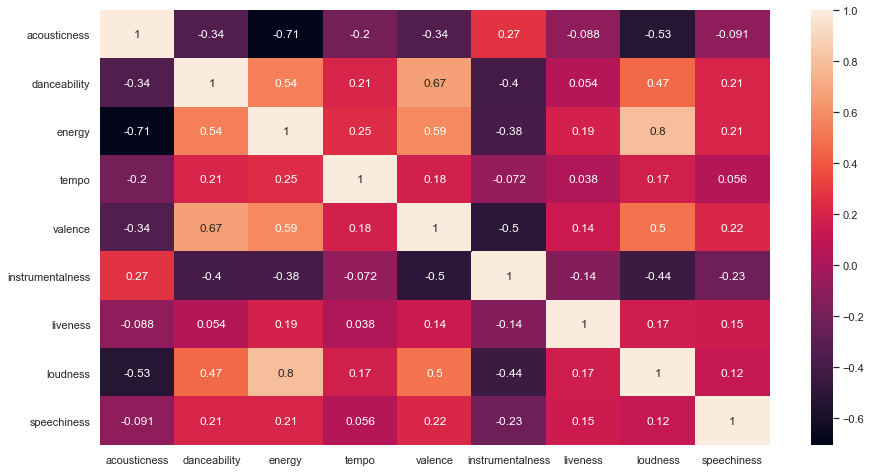

In [6]:
# 상관분석 -> heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor, annot=True)

## 3-4. Elbow method
- k=3,4,5 다 해본 결과 k=4일 때 군집 형성이 가장 잘 돼 4로 결정

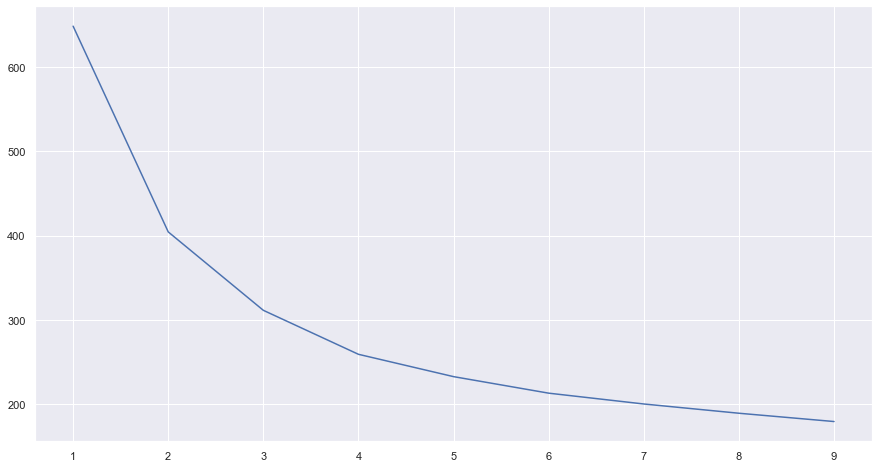

In [7]:
# 몇 개의 군집으로 분류하면 좋을지(완만해지는 부분)
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

idx = []
inertia = []
K = np.arange(1,10)
for i in K:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(features_normal)
    idx.append(i)
    inertia.append(kmeanModel.inertia_)
    
plt.plot(idx, inertia)
plt.show()

## 3-5. K-means clustering(n=4)

In [8]:
from sklearn.cluster import KMeans

KMeans = KMeans(n_clusters=4).fit(features_normal)
only_song['cluster'] = KMeans.fit_predict(features_normal)
only_song.head()

,title,music_director,artist_id,album_name,album_uri,track_name,preview_url,most_popular,popularity,acousticness,danceability,energy,tempo,valence,instrumentalness,liveness,loudness,speechiness,cluster
0,Inception,Hans Zimmer,0YC192cP3KPCRWx8zr8MfZ,Inception (Music From The Motion Picture),spotify:album:2qvA7HmSg1iM6XMiFF76dp,Time,https://p.scdn.co/mp3-preview/eb463247243646de...,6ZFbXIJkuI1dVNWvzJzown,73,0.155,0.221,0.0879,126.622,0.0401,0.698,0.0869,-16.996,0.0381,0
1,The Matrix,Don Davis,3eCpCUtYdBCM1twAb4mk8I,The Matrix Symphony,spotify:album:5vjpOYcCpXCWD0C2DKyqOS,The Matrix Symphony: 1. The Matrix,https://p.scdn.co/mp3-preview/246d8c1287fa0ffc...,72Dga8dl4M9aDnq2KEyQ74,9,0.881,0.091,0.2790,76.256,0.0372,0.916,0.1050,-16.499,0.0412,1
2,Avengers: Infinity War,Alan Silvestri,0Xk15jHKly4c3AhPr5vjoA,Avengers: Infinity War (Original Motion Pictur...,spotify:album:6Ltf5m1jvSomNQ0bhfuj5O,Porch,NaN,4tU1GfEahdy2NKGviJJuM4,53,0.912,0.127,0.0355,65.659,0.0834,0.594,0.1190,-28.803,0.0447,1
3,Back to the Future,Alan Silvestri,0Xk15jHKly4c3AhPr5vjoA,"Suite (From ""Back to the Future"")",spotify:album:205IlNRgW39tVyIKn1u7ek,"Suite (From ""Back to the Future"")",https://p.scdn.co/mp3-preview/6ea6ffaf6fdbda44...,3n0z81c5eX1gMaCJ9bLhnP,25,0.870,0.197,0.4990,79.723,0.1480,0.776,0.0398,-9.874,0.0581,1
4,"The Good, the Bad and the Ugly",Ennio Morricone,1nIUhcKHnK6iyumRyoV68C,"The Good, the Bad and the Ugly",spotify:album:7AOc5FtspkyvtF1eNUcnLx,"The Good, the Bad and the Ugly",https://p.scdn.co/mp3-preview/877d06cb3206d0b9...,3rBGxdOtyBepvioj1LwRwc,0,0.971,0.776,0.1060,119.929,0.1550,0.765,0.0825,-17.246,0.0794,1


In [9]:
feature_and_clus = pd.concat([features_normal, only_song['cluster']], axis=1)
feature_and_clus.head()

,acousticness,danceability,energy,tempo,valence,instrumentalness,liveness,loudness,speechiness,cluster
0,0.155617,0.243660,0.087758,0.585051,0.041213,0.700803,0.068184,0.631773,0.041145,0
1,0.884537,0.100331,0.279941,0.352337,0.038232,0.919679,0.089317,0.643758,0.044492,1
2,0.915662,0.140022,0.035061,0.303374,0.085714,0.596386,0.105663,0.347054,0.048272,1
3,0.873493,0.217200,0.501188,0.368356,0.152107,0.779116,0.013193,0.803516,0.062743,1
4,0.974899,0.855568,0.105960,0.554126,0.159301,0.768072,0.063047,0.625745,0.085745,1


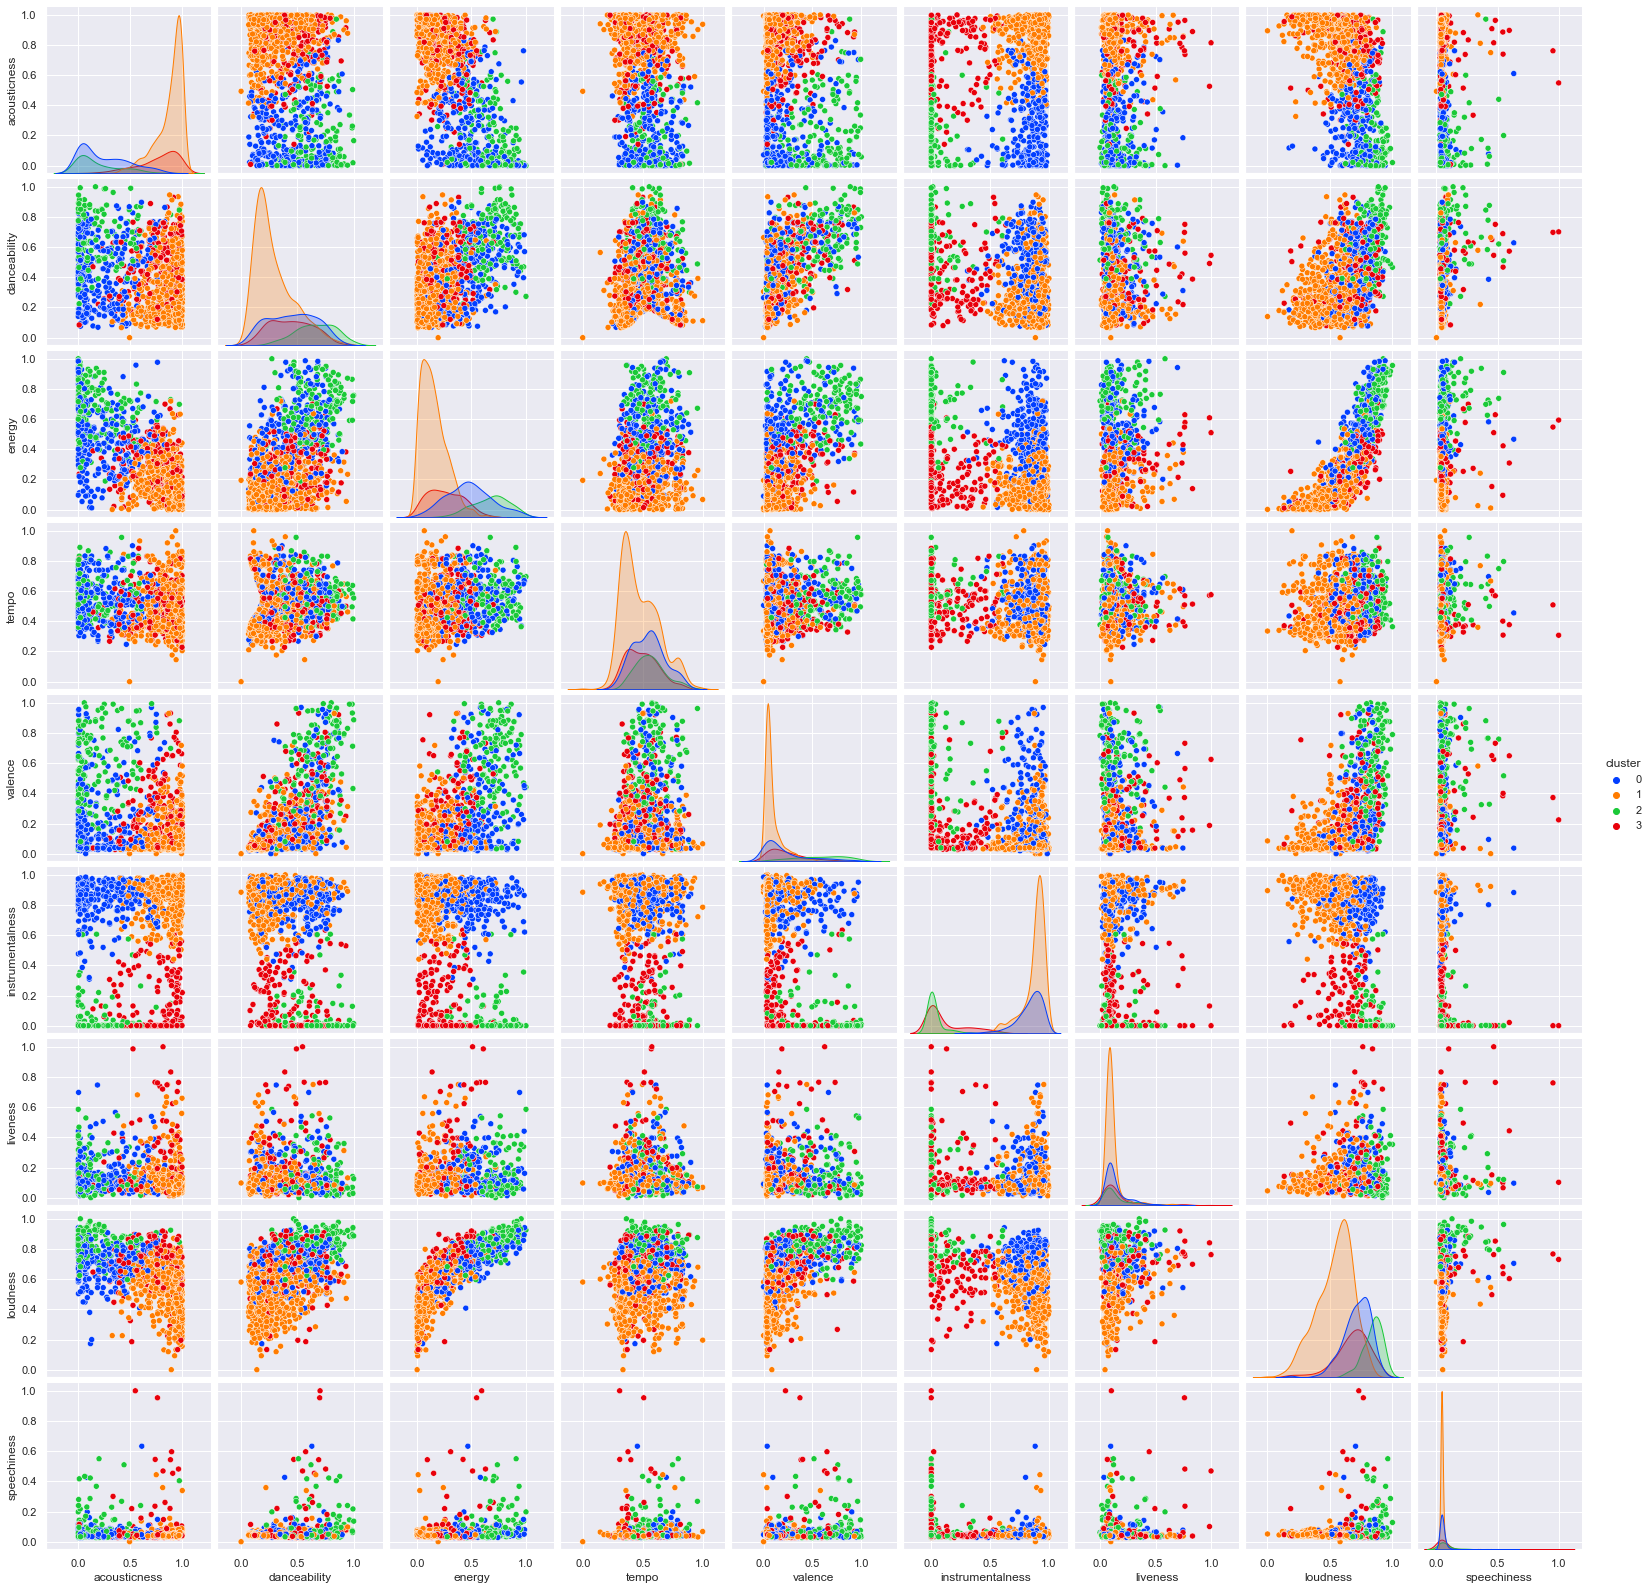

In [10]:
sns.pairplot(feature_and_clus, 
             diag_kind='kde',
             hue="cluster", 
             palette='bright') 
plt.show()

## 3-6. cluster별 feature 특징

In [11]:
groupby_clus = feature_and_clus.groupby(['cluster'], as_index=False).mean()
groupby_clus

,cluster,acousticness,danceability,energy,tempo,valence,instrumentalness,liveness,loudness,speechiness
0,0,0.244864,0.451743,0.478230,0.545890,0.218829,0.834450,0.140965,0.713479,0.052689
1,1,0.874606,0.291131,0.154030,0.478050,0.094857,0.874357,0.110422,0.538136,0.046879
2,2,0.194005,0.660707,0.673710,0.564355,0.571518,0.042648,0.142814,0.841859,0.089811
3,3,0.764108,0.442865,0.261413,0.491814,0.245440,0.124566,0.166464,0.676718,0.073254


<AxesSubplot:xlabel='variable', ylabel='value'>

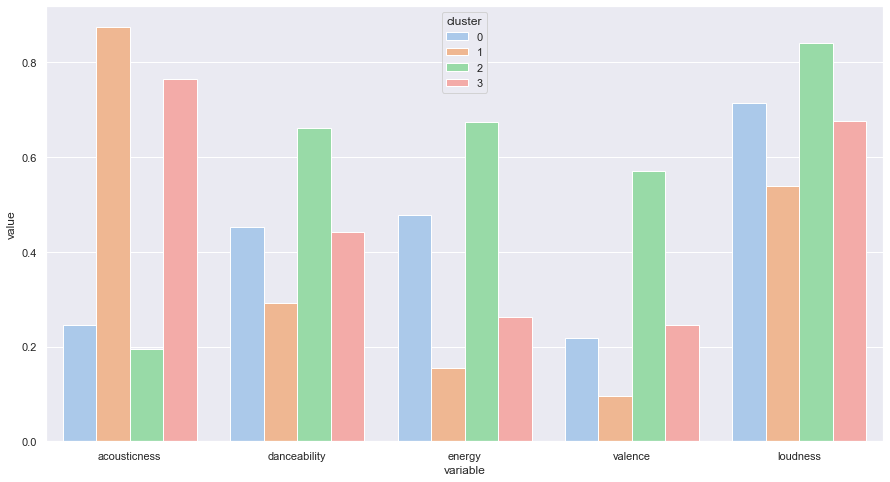

In [12]:
melt_clus = pd.melt(groupby_clus,
                   id_vars=['cluster'],
                   value_vars=['acousticness','danceability','energy',
                               'valence', 'loudness'])
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='variable', y='value', hue='cluster', palette='pastel', data=melt_clus)

## 3-7. t-sne

In [13]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2).fit_transform(features_normal)
x_embedded

array([[-38.22738  ,  -1.9727935],
       [ 15.243323 ,  19.760067 ],
       [ 29.208878 ,  25.557877 ],
       ...,
       [ 18.099758 , -16.431553 ],
       [  8.272196 , -35.26107  ],
       [-18.628897 ,  33.277523 ]], dtype=float32)

In [14]:
t_sne = pd.DataFrame(data=x_embedded, columns=['x', 'y'])
new_tsne = pd.concat([t_sne, only_song['cluster']], axis=1)

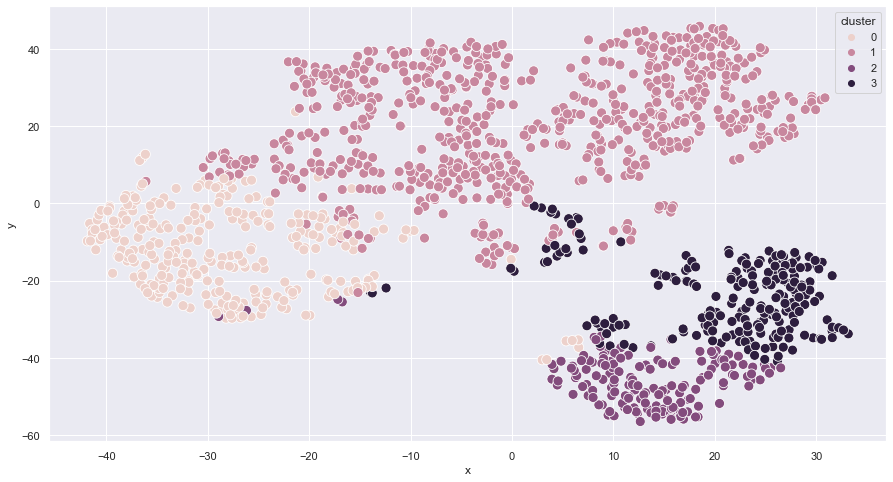

In [15]:
sns.scatterplot(x='x', 
                y='y', 
                hue='cluster', # different colors by group
                s=100, # marker size
                data=new_tsne)
plt.show()

## 3-8. pca

In [16]:
import pandas as pd

features = pd.read_csv('feature_id_list.csv')
features.head()
features_normal = features[['acousticness','danceability','energy','tempo','valence',
                            'instrumentalness','liveness','loudness','speechiness']]
features_normal

,acousticness,danceability,energy,tempo,valence,instrumentalness,liveness,loudness,speechiness
0,0.155617,0.243660,0.087758,0.585051,0.041213,0.700803,0.068184,0.631773,0.041145
1,0.884537,0.100331,0.279941,0.352337,0.038232,0.919679,0.089317,0.643758,0.044492
2,0.915662,0.140022,0.035061,0.303374,0.085714,0.596386,0.105663,0.347054,0.048272
3,0.873493,0.217200,0.501188,0.368356,0.152107,0.779116,0.013193,0.803516,0.062743
4,0.974899,0.855568,0.105960,0.554126,0.159301,0.768072,0.063047,0.625745,0.085745
...,...,...,...,...,...,...,...,...,...
1348,0.668673,0.233738,0.352349,0.508412,0.050771,0.943775,0.042615,0.715739,0.037689
1349,0.246983,0.194046,0.439842,0.705340,0.127441,0.951807,0.113835,0.698691,0.034881
1350,0.764055,0.202867,0.186414,0.551945,0.040904,0.225904,0.366025,0.579541,0.046436
1351,0.022082,0.390298,0.277930,0.424814,0.080164,0.062249,0.055225,0.682872,0.032829


<AxesSubplot:xlabel='x', ylabel='y'>

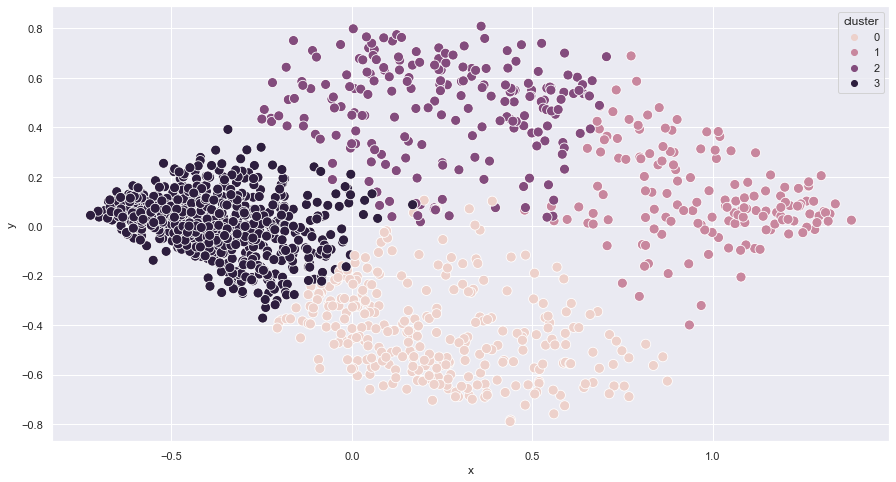

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=3)
pca.fit(features_normal)

pca_result = pca.transform(features_normal)
pca_result = pd.DataFrame(data=pca_result, columns=['x', 'y', 'z'])
new_pca = pd.concat([pca_result, features['cluster']], axis=1)
sns.scatterplot(x='x', 
                y='y', 
                hue='cluster', # different colors by group
                s=100, # marker size
                data=new_pca)

## 3-9. Euclidean distance 계산

In [ ]:
# Euclidean distance 계산해서 가까운 거리의 영화들 return
from scipy.spatial import distance
import pandas as pd
import ast
from math import dist
import time
import datetime
# title, 정규화된 features, cluster, feature값들이 들어간 리스트가 들어간 csv
data = pd.read_csv('feature_id_list.csv') 

# idx는 movie index
def get_nearest_movie(idx):
    cluster = data[data['ID'] == idx].values[0][-2] # movie가 속해있는 cluster 찾기
    clus_data = data[data['cluster'] == cluster]
    feature_list = ast.literal_eval(data[data['ID'] == idx].values[0][-1]) # str -> list
    index = data[data['ID'] == idx].index.values[0]
    
    dist_list = []
    for i, row in clus_data.drop(index).iterrows():
        row_feature_list = ast.literal_eval(row['feature_list'])
        dist = distance.euclidean(feature_list, row_feature_list)
        dist_list.append((row['ID'], dist))
        dist_list = sorted(dist_list, key=lambda x: x[1])
    close1 = dist_list[0][0] # movie index
    close2 = dist_list[1][0]
    close3 = dist_list[2][0]
    close4 = dist_list[3][0]
    
    return close1, close2, close3, close4

start = time.time()
print(get_nearest_movie(1))
end = time.time()

print(f"{end - start:.5f}")

## 3-10. feature importance 계산 & cluster별 histogram
- importance가 높은 loudness, acousticness, instrumentalness, tempo, energy로 radar plot 그리기로 결정

In [19]:
import pandas as pd

feature_impo = pd.read_csv('feature_importance.csv')
feature_impo = feature_impo.drop(columns=['Unnamed: 0'])
feature_impo.head()

,feature,importance,cluster
0,instrumentalness,0.834450,0.0
1,loudness,0.713479,0.0
2,tempo,0.545890,0.0
3,energy,0.478230,0.0
4,danceability,0.451743,0.0


Text(0.5, 1.0, 'cluster 0')

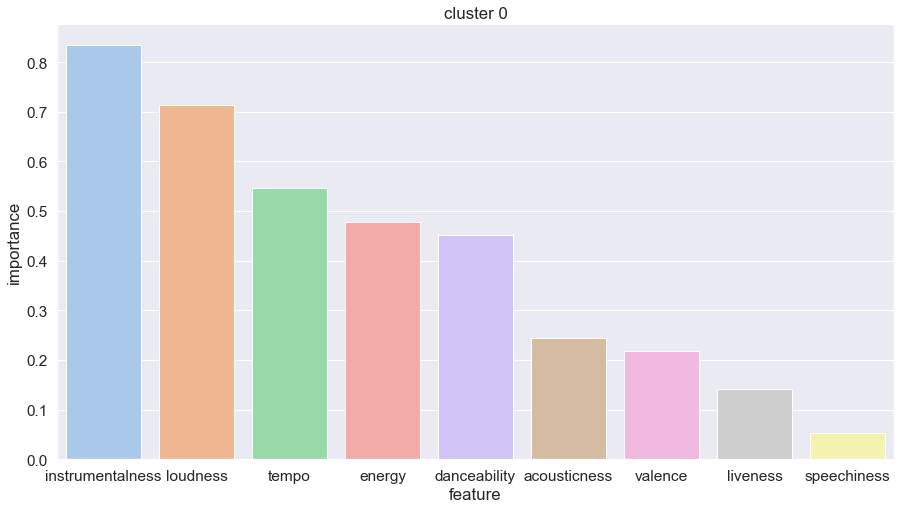

In [20]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=1.4)
clus0 = sns.barplot(x='feature', y='importance', palette='pastel', 
            data=feature_impo[feature_impo['cluster'] == 0])
clus0.set_title('cluster 0')

Text(0.5, 1.0, 'cluster 1')

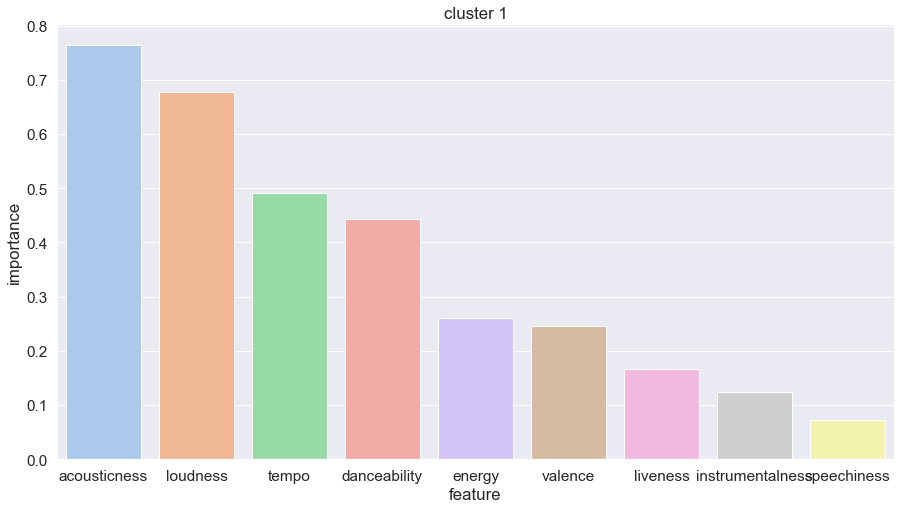

In [21]:
clus1 = sns.barplot(x='feature', y='importance', palette='pastel', 
            data=feature_impo[feature_impo['cluster'] == 1])
clus1.set_title('cluster 1')

Text(0.5, 1.0, 'cluster 2')

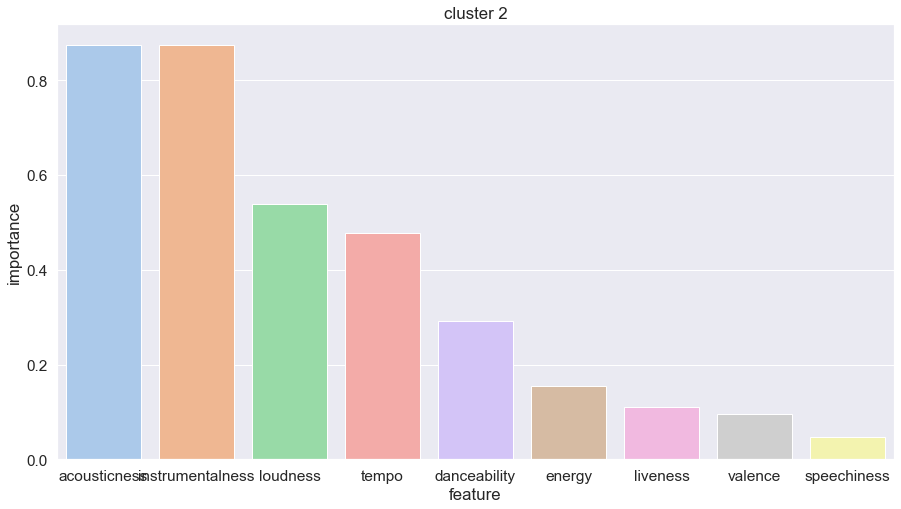

In [22]:
clus2 = sns.barplot(x='feature', y='importance', palette='pastel', 
            data=feature_impo[feature_impo['cluster'] == 2])
clus2.set_title('cluster 2')

Text(0.5, 1.0, 'cluster 3')

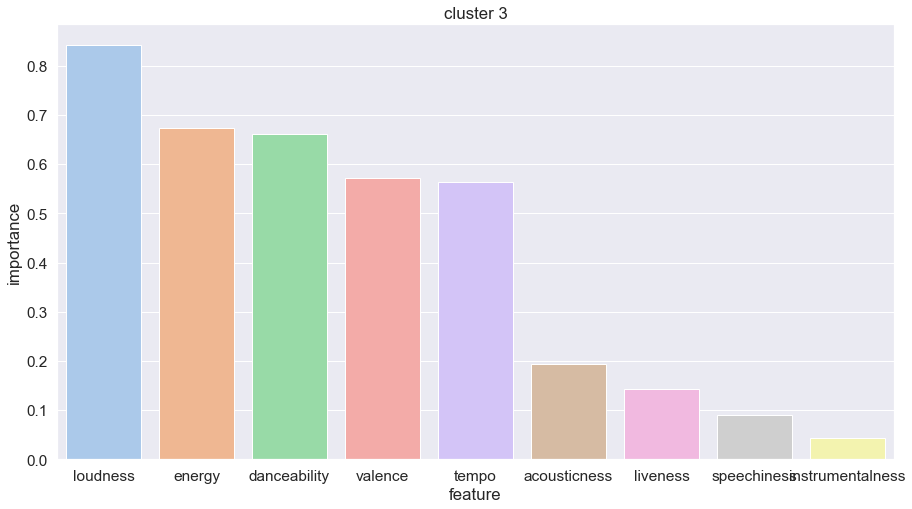

In [23]:
clus3 = sns.barplot(x='feature', y='importance', palette='pastel', 
            data=feature_impo[feature_impo['cluster'] == 3])
clus3.set_title('cluster 3')